In [20]:
# Import required libraries

In [21]:
import pandas as pd
import numpy as np
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [22]:
# Import the Dataset
dataset = pd.read_csv("bill_authentication.csv")

In [23]:
# View the number of rows and columns in our dataset
dataset.shape

(1372, 5)

In [24]:
# Inspect the first five records of the dataset
dataset.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [25]:
# Divide the data into attributes and labels
x = dataset.drop('Class', axis=1)
y = dataset['Class']

In [26]:
# Here the X variable contains all the columns from the dataset, except the "Class" column. 
# The y variable contains the values from the "Class" column. 
# The X variable is the attribute set and y variable contains corresponding labels.

In [27]:
# Divide the data into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [28]:
# The model_selection library of Scikit-Learn contains train_test_split method.
# We can use it to randomly split the data into training and testing sets.
# The test_size parameter specifies the ratio of the test set.
# We to split up 20% of the data in to the test set and 80% for training.

In [29]:
# Now we can train the logistic regression algorithm on this data and make predictions. 
# Scikit-Learn contains the linear model library, which contains built-in classes/methods for various logistic regression algorithms.

In [30]:
# import the class
from sklearn.linear_model import LogisticRegression
# instantiate the model (using the default parameters)
logreg = LogisticRegression(solver='lbfgs')
# fit the model with data
logreg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [31]:
# For more information refer
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [32]:
# Now we can make predictions on the test data. 
# To make predictions, the predict method is used.

In [33]:
y_pred=logreg.predict(x_test)

In [34]:
# Model Accuracy, Precision and Recall
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9854545454545455
Precision: 0.9784172661870504
Recall: 0.9927007299270073


In [35]:
# Generating the confusion matrix
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[135,   3],
       [  1, 136]], dtype=int64)

In [36]:
# For more information refer
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [37]:
# Computing the Receiver operating characteristic (ROC)
y_pred_proba = logreg.predict_proba(x_test)[::,1]
fpr, tpr, _= metrics.roc_curve(y_test,  y_pred_proba)

# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

0.999576853908812

In [38]:
# For more information refer
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html

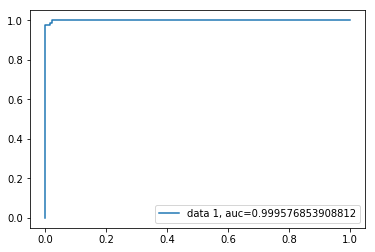

In [41]:
# Plotting the ROC curve
# import required modules
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [40]:
# Start with the Jupyter Notebook “LogisticRegressionDisease.ipynb” you created for the assignment in week 8. Do the following

#     a) Print the Accuracy, Precision and Recall for your model

#     b) Print the confusion matrix

#     c) Print the ROC AUC from prediction scores

#     d) Plot the ROC curve

#     e) Submit the “LogisticRegressionDisease.ipynb”